In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

<Axes: >

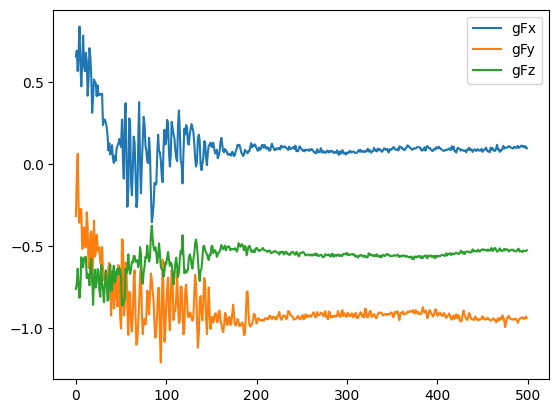

In [57]:

def create_file(path, n, trim : bool = False):
  test = pd.read_csv(path)
  test.drop(columns = ["TgF"], inplace = True)
  test_ = signal.resample(test[["gFx", "gFy", "gFz"]], n)

  test_ = pd.DataFrame(test_, columns = ["gFx", "gFz", "gFy"])
  test_ = - 1 * test_
  if trim:
    test_.columns = ["gFx", "gFy", "gFz"]
    return test_
  list_ = ["gFx", "gFy", "gFz"]
  test_ = test_[list_]

  return test_.iloc[200:700, :].reset_index(drop = True)

r = create_file("Rawdata\\Aarsh_laying_1.csv", 1500)
r.plot()

In [58]:
# Our static: n=1500
# Our dynamic: n=1000
# Hari: All 500.

In [59]:
def save_file(path, n, trim : bool = False):
  test = create_file(path, n, trim)
  test.to_csv("ProcessedData\\" + path.split("\\")[-1], index = False)

In [60]:
# For all files in the Rawdata directory, process them and save them in the ProcessedData directory.
# If the filename has "Hari" in it, then we will use n=500 and trim=True, else if it has "sitting", "standing", "laying", then we will use n=1500. Otherwise, we will use n=1000.
import os
for file in os.listdir("Rawdata"):
  if "Hari" in file:
    save_file("Rawdata\\" + file, 500, True)
  elif "sitting" in file or "standing" in file or "laying" in file or "Sitting" in file or "Standing" in file or "Laying" in file:
    save_file("Rawdata\\" + file, 1500)
  else:
    save_file("Rawdata\\" + file, 1000)

<Axes: >

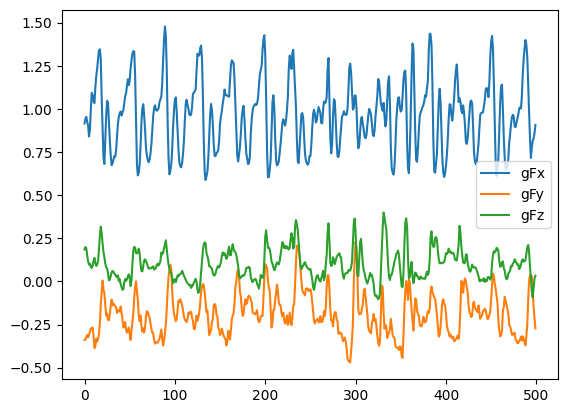

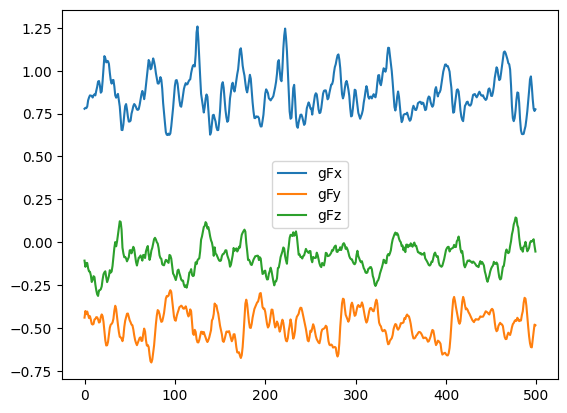

In [61]:
test1 = pd.read_csv("ProcessedData\\Abhinav_walking_upstairs_1.csv")
test2 = pd.read_csv("ProcessedData\\Hari_walking_upstairs_1.csv")
test1.plot()
test2.plot()


In [62]:
display(test1); display(test2)

,gFx,gFy,gFz
0,0.915805,-0.339303,0.185574
1,0.942689,-0.337368,0.198858
2,0.953861,-0.323484,0.191798
3,0.924777,-0.310018,0.150325
4,0.902466,-0.324068,0.114919
...,...,...,...
495,0.776605,0.029506,-0.059726
496,0.817178,-0.053549,-0.093310
497,0.827347,-0.152463,-0.039439
498,0.860322,-0.214563,0.019778


,gFx,gFy,gFz
0,0.777951,-0.440132,-0.107685
1,0.783554,-0.401314,-0.143920
2,0.781552,-0.419862,-0.121416
3,0.790863,-0.404693,-0.121314
4,0.827336,-0.424061,-0.152727
...,...,...,...
495,0.908980,-0.613623,0.003553
496,0.833684,-0.567159,0.008732
497,0.778526,-0.523211,0.016914
498,0.765022,-0.480758,-0.021552
